In [11]:
from src.hopfield_network import *
import os
import matplotlib.pyplot as plt

In [12]:
path = "data/"
imgs = []
for f in os.listdir(path):
    if f.split(".")[-1]=="pbm":
        imgs.append(read_pbm(path+"/"+f))

In [13]:
train_data = create_train_data(imgs)
hn = HopfieldNetwork()
hn.train_network(train_data)

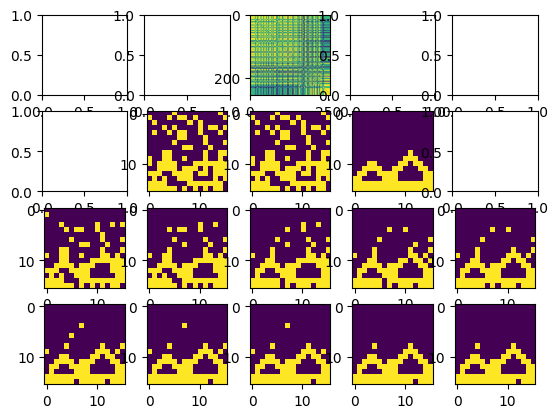

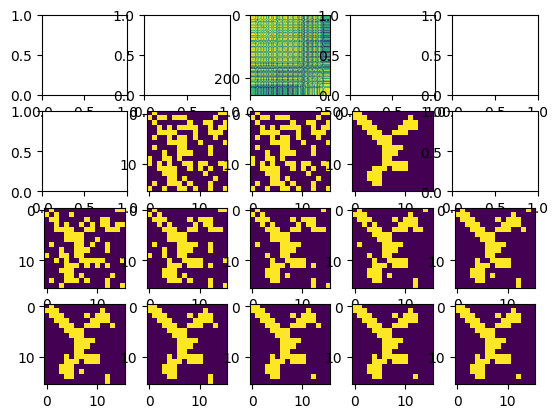

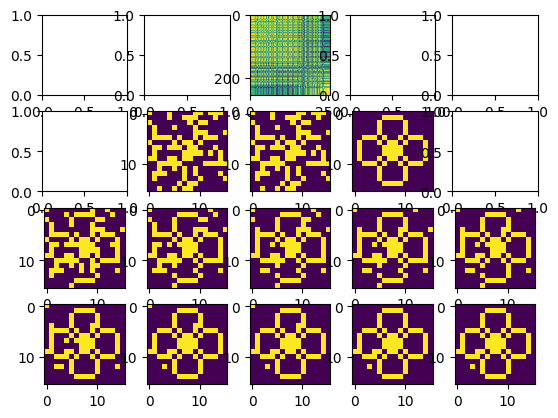

In [14]:
for img in imgs:
    predict_async(hn, img, True, 0.3)

(4, 0) (14, 10)


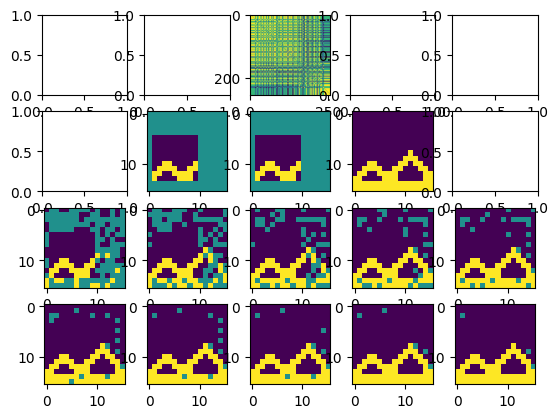

(0, 0) (10, 10)


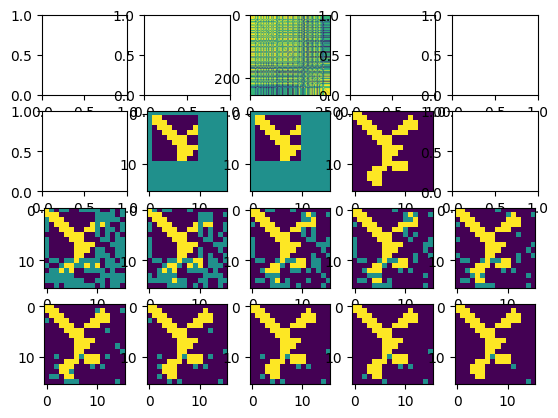

(1, 5) (11, 15)


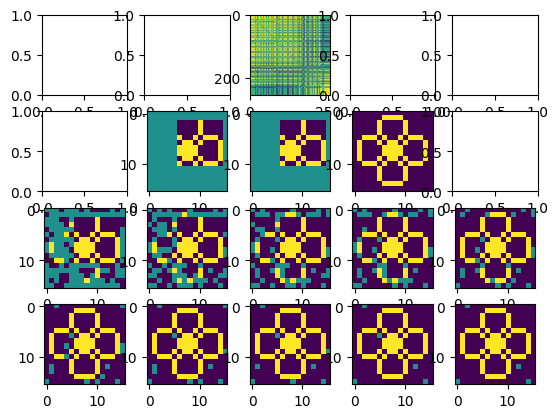

In [15]:
for img in imgs:
    predict_async(hn, img, False, 0.3)

(5, 1) (15, 11)


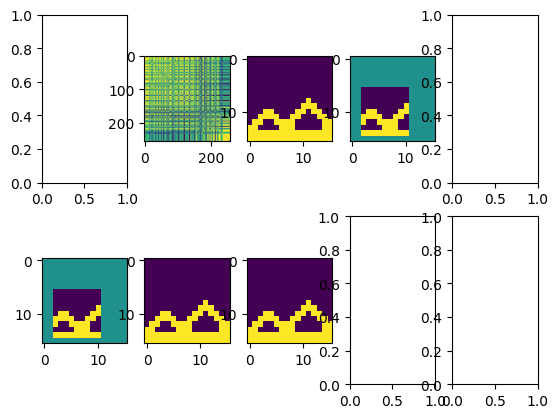

(1, 1) (11, 11)


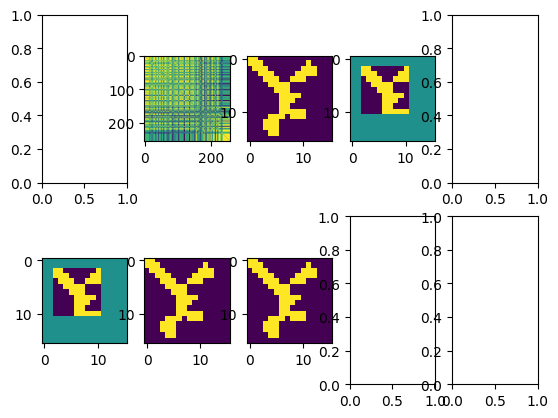

(0, 4) (10, 14)


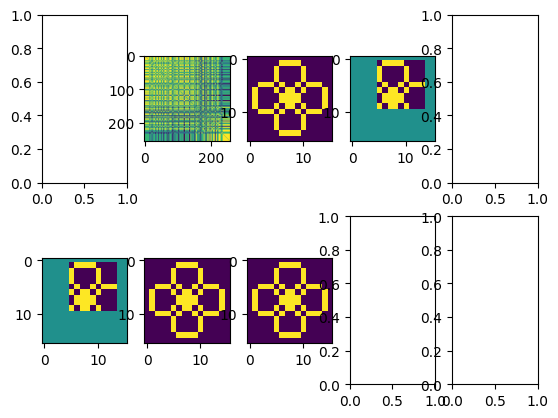

In [16]:
for img in imgs:
    predict_sync(hn, img, False, 0.3, True)

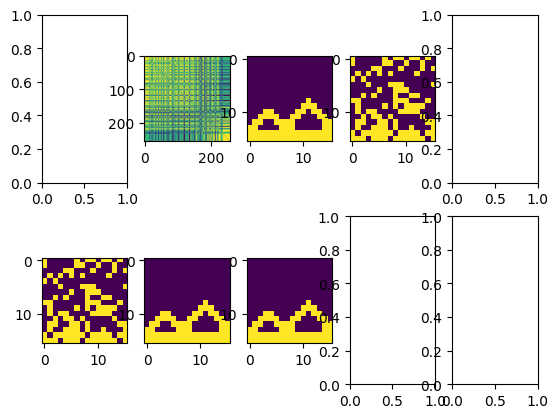

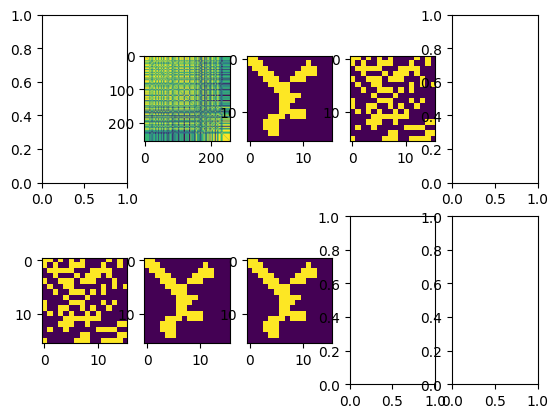

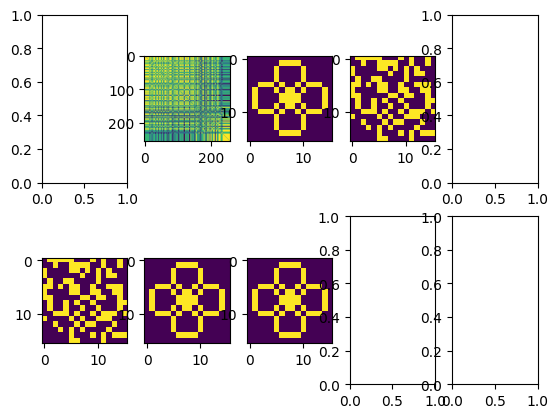

In [17]:
for img in imgs:
    predict_sync(hn, img, True, 0.3, True)

In [18]:
probabilities = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
foreach_steps = []
corrects = []
for p in probabilities:
    steps = []
    correct = 0
    for img in imgs:
        for i in range(20):
            n, states = predict_sync(hn, img, True, p, False)
            if (states[-1] == img).all() or ((states[-1]*-1)==img).all():
                correct+=1
                steps.append(n)
    corrects.append(correct)
    foreach_steps.append(steps)
    print(p, " done")

0.2  done
0.3  done
0.4  done
0.5  done
0.6  done
0.7  done
0.8  done
0.9  done


In [19]:
print(len(foreach_steps), len(corrects))
for i in range(len(foreach_steps)):
    print(len(foreach_steps[i]), corrects[i])

8 8
60 60
60 60
49 49
11 11
50 50
57 57
59 59
60 60


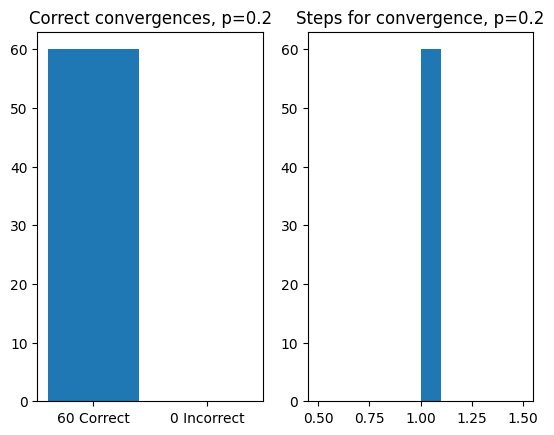

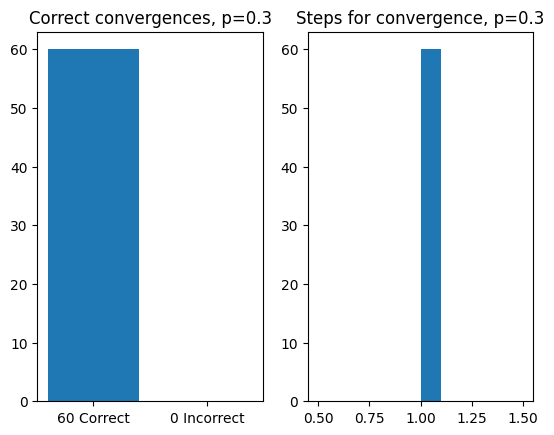

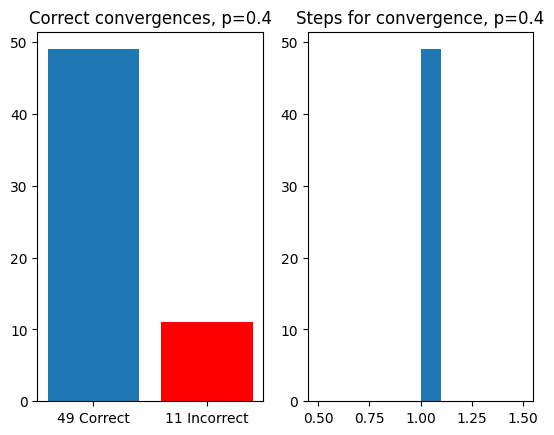

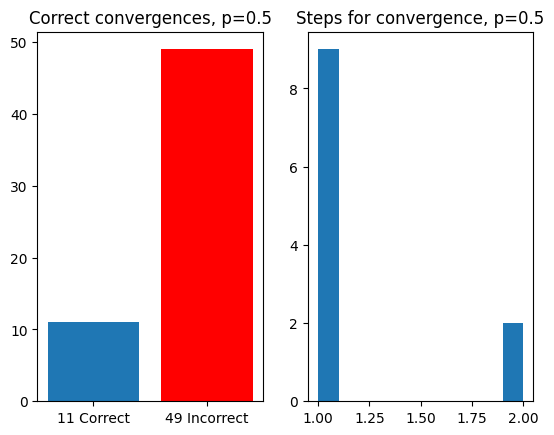

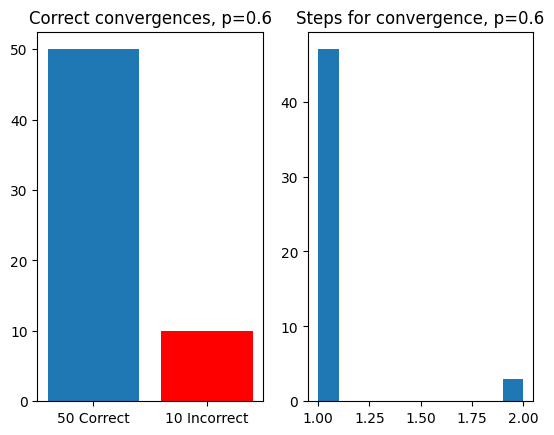

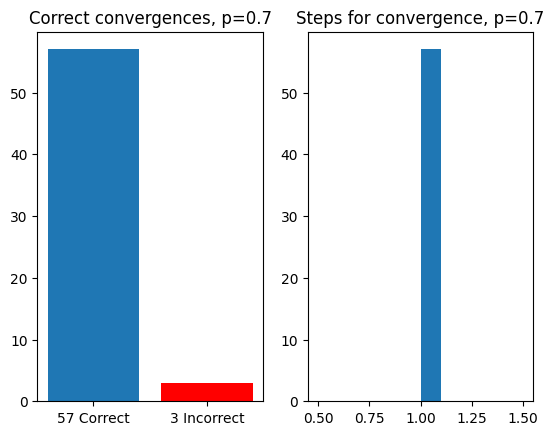

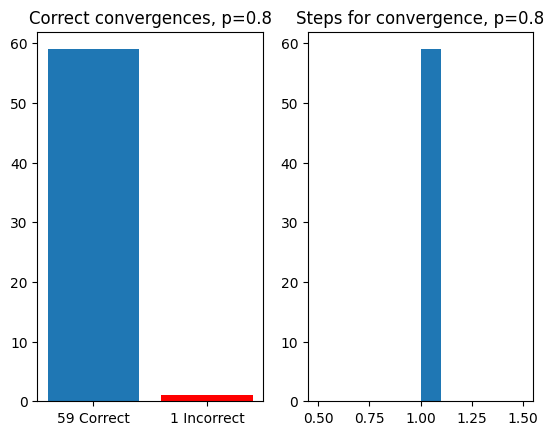

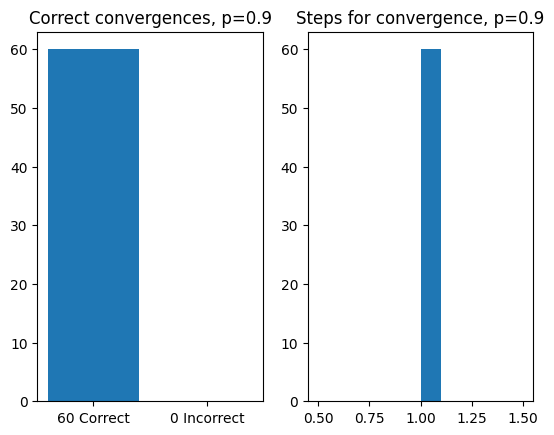

In [20]:
for i in range(len(foreach_steps)):
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.bar([f"{corrects[i]} Correct", f"{60-corrects[i]} Incorrect"], [corrects[i], 60-corrects[i]], color=["tab:blue", "red"])
    ax1.set_title(f"Correct convergences, p={probabilities[i]}")
    ax2.hist(foreach_steps[i])
    ax2.set_title(f"Steps for convergence, p={probabilities[i]}")
